<h1><center>Introduction to Scientific Packages II (Matplotlib and Pandas)</center></h1>

> 1. Basics of Matplotlib
>> - The basic plot
>> - Subplots and Axis elements
>> - GridSpec
>> - Some examples of decorating your figure
> 2. Basics of Pandas
>> - The Series and DataFrame classes
>> - Filtering by columns and rows
>> - I/O functions
>> - Looking at data
>> - Summarizing data
>> - GroupBy for exploring data



<u>Main modules of interest:</u>
> <b>Matplotlib</b> : High-quality 2D charting library that has functions taking data arrays as inputs and returning figures. Also, allows us to focus on visual effects like colors or spacing an an abstract level. (https://matplotlib.org)
>
> <b>Pandas</b> : Used for data analysis and making tabular data structures with mixed data types (DataFrames). Organizes everything visually into tables which can be useful if you get lost in what's stored where. (This will only be used behind the scenes in this lesson, https://pandas.pydata.org)

<u>List of other included modules</u>:
> <b>OS</b> : Standard input-output functions for accessing and saving files on your operating system. (https://docs.python.org/3/library/os.html)


## Import modules

In [1]:
# data handling module
import pandas as pd
import numpy as np

# data viz module
import matplotlib.pyplot as plt 
# the percent sign below is something called Jupyter magic making the Jupyter Notebook interactive
# - (In this case, just plotting figures inside the notebook.)
%matplotlib inline 

# I/O + system module
import os

## Basics of Matplotlib

Matplotlib is built around two Python objects:
+ Figure objects
+ Axes objects


These two classes are your bread-and-butter interfaces to the plotting <i>backends</i>. <i>Backends</i> deal with how the plots are rendered into the different image formats (.jpg, .svg, .pdf, .png, etc). You don't need to do anything with the backends for the most part - just know that we structure the figure layout with Python code, and the backend renders it into an image that could be <i>rasterized</i> (made up of pixel dots with different properties), <i>vectorized</i> (expressed as scalable vectors having multiple layers to the image), etc.

They also have very similar functionality and interact with each other. You will be using both constantly throughout the entire data science workflow - from exploring data to designing more elaborate and informative figures for publications/presentations.

> <b>Note</b>: There are a number of visualization packages. Some examples include: <b>Matplotlib</b>, <b>Seaborn</b>, <b>Bokeh</b>, and <b>Plotly</b>.
> 
> All packages are typically built around <b>Matplotlib</b>

**Pros:**
<ul> 
<li>Huge amount of functionality/options. (There are >70,000 lines of code associated with this library.)
<li>Works with numpy arrays and python lists.
<li>Comes with many prepackaged Python distros (anaconda, WinPython, etc.).
<li>Easily saves plots to raster (.png, .bmp, etc.) and vector (.svg, .pdf, etc.) formats.
<li>Has an excellent set of examples for coming up with figure layouts (with code) at http://matplotlib.org/gallery.
<li>Shares many syntactic conventions with Matlab.
</ul>


**Cons:**
<ul>
<li>Slow for rapidly updating plots.
<li>3D plotting support is not great.
<li>Documentation is not always useful (it's actually very extensive, but often out-of-date or lacking in up-to-date examples)
<li>Essentially has two primary interfaces.  One is intended to be close to Matlab, the other is object oriented.  You will find examples that assume one or the other, but rarely the one you are after. 
    - There actually several interfaces that work with several backends.
<li>Shares many syntactic conventions with Matlab.
</ul>

### The basic plot using the Figure Class

In [2]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure, or activate an existing figure.
    
    Parameters
    ----------
    num : int or str, optional
        A unique identifier for the figure.
    
        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string refers to the figure label.
    
        If there is no figure with the identifier or *num* is not given, a new
        figure is created, made active and returned.  If *num* is an int, it
        will be used for the ``Figure.number`` attribute, otherwise, an
        auto-generated integer value is used (starting at 1 and incremented
        for each new figure). If *num* is a string, the figure label and the
        window title is s

In [3]:
# This is our interface
fig = plt.figure() # the "basic plot" is class instance with a size and Axes attributes associated with it



<Figure size 432x288 with 0 Axes>

In [4]:
type(fig) # this type is handled by the new_figure_manager behind the scenes so that w 



matplotlib.figure.Figure

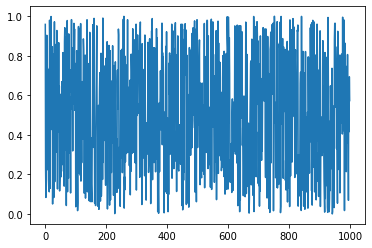

In [5]:
# let's look at some "data" 
fake_data = np.random.random(1000)

# we create a Figure instance
fig = plt.figure()

# we then call the plot method
plt.plot(fake_data) 

Notice that the "plot" method creates a 2D "line" plot. This line plot could be a timeseries, i.e., an time-ordered sequence of values, but can also be anything we want to be plotted using a line plot. One example could be plotting the curve of reconstruction errors for machine-learning models as we vary learning parameters.

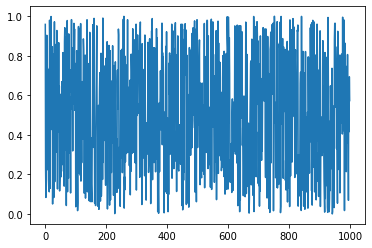

In [6]:
# can also clean our cell output by adding a semi-colon to 
# the end of the last line of the cell. These can get messy 
# the more elements are involved in the last line.
plt.plot(fake_data);


> <b>Note</b>: Generally, we want to tell the interpreter when to render the final plot. This is done with matplotlib.pyplot.show(). However, since we're using a Jupyter Notebook and used Jupyter "magic" to render plots in-line, we aren't here. This should be done (in conjuction to "closing" plots via matplotlib.pyplot.close() ...) when you are running code in scripts

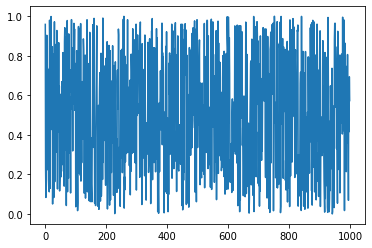

In [7]:
# ... the bare minimum of the Figure instance
fig # WHAT HAPPENED TO THE AXES??

## The Anatomy of a Figure

See figures folder.

### The Axes Class and Subplots

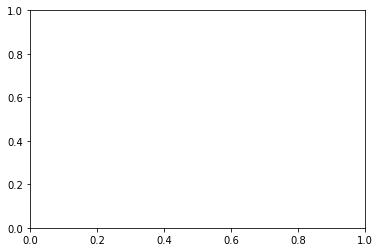

In [8]:
# subplots creates the entire layout and gives us access to the Axes of Figure
fig, ax = plt.subplots() # <- returns a tuple



In [9]:
ax, type(ax)

(<AxesSubplot:>, matplotlib.axes._subplots.AxesSubplot)

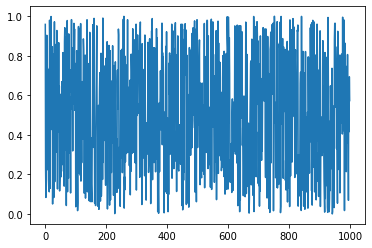

In [10]:
# we can essentially do the same thing as before
fig, ax = plt.subplots()

ax.plot(fake_data) # here we work directly with the Axes 

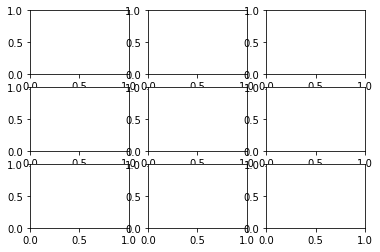

In [11]:
# How are multiple axes stored?
fig, axs = plt.subplots(nrows=3,ncols=3)



In [12]:
type(axs) # as a numpy array



numpy.ndarray

In [13]:
# Axes object is a... of shape...?
axs, axs.shape



(array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 (3, 3))

In [14]:
# ... and can be indexed like any other array
print(axs[0,1]) # note the address



AxesSubplot(0.398529,0.657941;0.227941x0.222059)


In [15]:
print(axs[2,1]) # third row, second col



AxesSubplot(0.398529,0.125;0.227941x0.222059)


> <b>Note</b>: Generally, I like to collapse the 2D grid to use with non-nested for loops when I need to plot several subplots. This is a preference, and not necessarily universal.

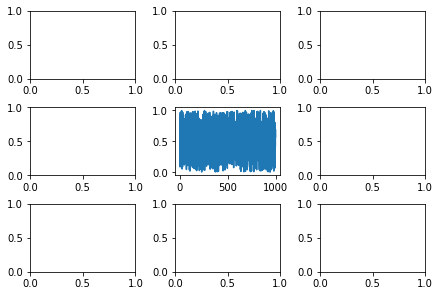

In [16]:
# example of collapsing using Numpy
fig, axs = plt.subplots(3,3,
                       constrained_layout=True) # changes spacing
# numpy.array function
axs = axs.ravel() # unwraps the 3x3 array into a 1x9 array

axs[4].plot(fake_data); # == axs[1,0]

> Alternatively, you can use axs.flatten() for a similar effect.

### GridSpec
> The GridSpec class gives us more control over the placement and span of each of the subplots
>
> If you need even MORE control, look into the <b>mpl_toolkits</b> Python library. Example. AxesGrid can give you even more control

In [17]:
from matplotlib.gridspec import GridSpec

In [18]:
gs = GridSpec(nrows=3,ncols=3)

In [19]:
type(gs), gs

(matplotlib.gridspec.GridSpec, GridSpec(3, 3))

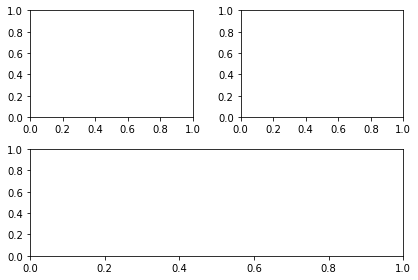

In [20]:
# the main power of grid spec is scaling the subplots
fig = plt.figure()

# Create grispec object and define each subplot
gs = GridSpec(2, 2) # 2 x 2 is the shape

# We can create each axis here
ax0 = plt.subplot(gs[0, 0]) # Top left corner
ax1 = plt.subplot(gs[0, 1]) # Top right corner
ax2 = plt.subplot(gs[1, :]) # Bottom, span entire width

plt.tight_layout();

Let's just make a figure and dissect the pieces to it. Matplotlib is definitely one of those packages you'll have to explore. The first Data Exercise should be very helpful for this! 

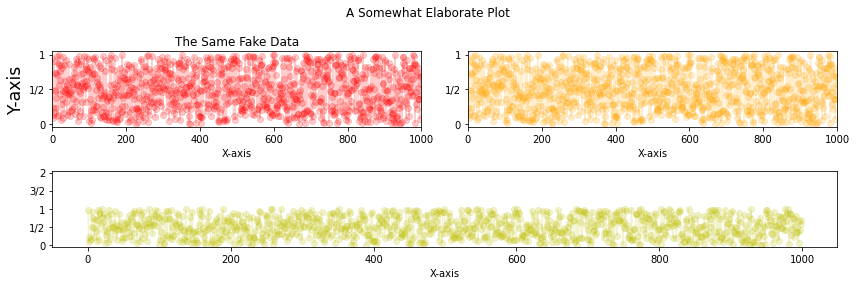

In [23]:
# Create and empty figure - DON'T SPECIFY ANY SHAPE DETAILS ABOUT THE FIGURE
fig = plt.figure(figsize=(12,4)) # figsize sets the width by the height

# Create grispec object and define each subplot - a different method
ncols, nrows = 2,2
spec = fig.add_gridspec(ncols=ncols, nrows=nrows, # we use the attribute method to create it
                figure=fig) # here we tell grid spec what figure it belongs to

# let's add some colors, too
colors = [['r','orange'],['y']] # frequently used colors are specified using strings
                                # and some can be specified using shorthand single characters 

# Now we directly add the subplots
for ax_j in range(ncols):
        ax = fig.add_subplot(spec[0,ax_j])

        
        ax.plot(fake_data,
                color=colors[0][ax_j],
                
                # we're just going to throw in some example changes here
                marker='o', # adding circles to the lines
                alpha=0.2 # changes the opacity (values between 0 and 1)
                )
        
        # we can decorate specific axes
        ax.set_xlabel('X-axis')
        ax.set_xlim([0,1000])
        
        if ax_j==0:
            ax.set_ylabel('Y-axis',size='xx-large')
            
        
        ax.set_title('The Same Fake Data')
            
        ax.set_yticks([0,0.5,1.0])
        ax.set_yticklabels(['0','1/2','1'])
        
# bottom row       
ax_bot = fig.add_subplot(spec[1,:])
ax_bot.plot(fake_data,
                color=colors[1][0],
                
                # we're just going to throw in some example changes here
                marker='o', # adding circles to the lines
                alpha=0.2 # changes the opacity (values between 0 and 1)
                )

ax_bot.set_xlabel('X-axis')
ax_bot.set_yticks([0,0.5,1.0,1.5,2])
ax_bot.set_yticklabels(['0','1/2','1','3/2','2'])
ax_bot.set_ylim(top=2.05) 

        
        
plt.suptitle('A Somewhat Elaborate Plot')


plt.tight_layout(); # similar to "constrained_layout"

## Basic of Pandas

<b>Pandas</b> is a Python library for high-level data structures and data manipulation.

This includes:
> + loading/saving data
> + filtering, selecting, grouping functions
> + basic data exploration
> + plotting and visualization

Pandas is built around two data structures: 
> + Series objects, and 
> + DataFrame objects

Pandas is just not Zen (https://twitter.com/tymwol/status/1390281948564701184). So we will really just take a very brief glimpse at its functionality. You'll discover your own way of working with Pandas, though.

### The Series and DataFrame

In [24]:
example = {'order' : [0,1,2,23,24,25],
           'alphabet' : ['a','b','c','x','y','z']}

df = pd.DataFrame(example) # notice that D and F are capitalize

df

,order,alphabet
0,0,a
1,1,b
2,2,c
3,23,x
4,24,y
5,25,z


In [25]:
df.index # [0,6) by 1

RangeIndex(start=0, stop=6, step=1)

In [26]:
df.columns # column is essentially a list so can have mixed built-in types, 
        #  here we just have strings

Index(['order', 'alphabet'], dtype='object')

### Filtering by columns

In [27]:
# we can select columns
print(df['order'])

print('Type =',type(df.order)) # every column in a DataFrame is a Series

0     0
1     1
2     2
3    23
4    24
5    25
Name: order, dtype: int64
Type = <class 'pandas.core.series.Series'>


In [28]:
example['order']



[0, 1, 2, 23, 24, 25]

In [29]:
series = pd.Series(example['order'])

series # this is the same as above, but has 
       # no Name associated with it

0     0
1     1
2     2
3    23
4    24
5    25
dtype: int64

### Columns (and rows) can be Numpy arrays or Lists depending on needs

In [30]:
np.array(df['order'])# using Numpy for casting


array([ 0,  1,  2, 23, 24, 25])

In [31]:
df['order'].values # second is Pandas function and preferred



array([ 0,  1,  2, 23, 24, 25])

In [32]:
list(df['alphabet']) # using built-in function for casting



['a', 'b', 'c', 'x', 'y', 'z']

In [33]:
df['alphabet'].tolist() # using Pandas



['a', 'b', 'c', 'x', 'y', 'z']

### Filtering rows

In [34]:
# we can also select rows
df.loc[1] # returns row values for row with index LABELED as 1


order       1
alphabet    b
Name: 1, dtype: object

In [35]:
df.iloc[1] # returns row values for row in index POSITION 1


order       1
alphabet    b
Name: 1, dtype: object

In [36]:
df[df.index==1] # this one returns a view into the DataFrame
                # for any and ALL indices satisfy this



,order,alphabet
1,1,b


### Selecting values

In [37]:
df['alphabet'][0], df['alphabet'].iloc[0], df['alphabet'].loc[0]


('a', 'a', 'a')

### Loading data

There are methods for reading several different data formats

In [38]:
print(dir(pd)) # recall dir gives us everything in the namespace 


['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p16', '_np_version_under1p17', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_range', 'comp

In [39]:
# Examples of loading
load_list = [x for x in dir(pd) if 'read' in x]

for method in load_list:
    print(method)



read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_orc
read_parquet
read_pickle
read_sas
read_spss
read_sql
read_sql_query
read_sql_table
read_stata
read_table


### Reading a specific file

In [40]:
path_to_dir = os.getcwd() # get the current working directory (cwd)
path_to_data = 'exercise_data'
filename = 'pokemon_alopez247.csv'

# join paths 
f = os.path.join(path_to_dir,path_to_data,filename)

print(f)



/home/vrhaynes/PythonDataCamp/exercise_data/pokemon_alopez247.csv


In [41]:
help(pd.read_csv)



Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [42]:
pokemon_df = pd.read_csv(f) # data is read

### Let's take look at the data

In [43]:
pokemon_df.head() # first 5

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [44]:
pokemon_df.tail(15) # last 15

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
706,707,Klefki,Steel,Fairy,470,57,80,91,80,87,...,Grey,True,0.5,Mineral,NaN,False,0.20,3.0,75,head_only
707,708,Phantump,Ghost,Grass,309,43,70,48,50,60,...,Brown,True,0.5,Grass,Amorphous,False,0.41,7.0,120,head_arms
708,709,Trevenant,Ghost,Grass,474,85,110,76,65,82,...,Brown,True,0.5,Grass,Amorphous,False,1.50,71.0,60,several_limbs
709,710,Pumpkaboo,Ghost,Grass,335,49,66,70,44,55,...,Brown,True,0.5,Amorphous,NaN,False,0.41,5.0,120,head_only
710,711,Gourgeist,Ghost,Grass,494,65,90,122,58,75,...,Brown,True,0.5,Amorphous,NaN,False,1.70,39.0,60,head_base
711,712,Bergmite,Ice,NaN,304,55,69,85,32,35,...,Blue,True,0.5,Monster,NaN,False,0.99,99.5,190,quadruped
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,...,Blue,True,0.5,Monster,NaN,False,2.01,505.0,55,quadruped
713,714,Noibat,Flying,Dragon,245,40,30,35,45,40,...,Purple,True,0.5,Flying,NaN,False,0.51,8.0,190,two_wings
714,715,Noivern,Flying,Dragon,535,85,70,80,97,80,...,Purple,True,0.5,Flying,NaN,False,1.50,85.0,45,two_wings
715,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,...,Blue,False,NaN,Undiscovered,NaN,False,3.00,215.0,45,quadruped


In [45]:
# Do we have missing data in one of our columns
pokemon_df.isnull().values.any() # if so, normally these need to imputed OR
                                 # removed. If removed, you need to report how many and why.



True

In [46]:
# you can grab the column values
pokemon_df.columns.tolist()

['Number',
 'Name',
 'Type_1',
 'Type_2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp_Atk',
 'Sp_Def',
 'Speed',
 'Generation',
 'isLegendary',
 'Color',
 'hasGender',
 'Pr_Male',
 'Egg_Group_1',
 'Egg_Group_2',
 'hasMegaEvolution',
 'Height_m',
 'Weight_kg',
 'Catch_Rate',
 'Body_Style']

In [47]:
# How many and where?
total = 0
columns_with_nans = []

for column in pokemon_df.columns.tolist():
    
    nan_count = len([val for val in pokemon_df[column].tolist() if val is np.nan])
    
    if bool(nan_count):
        total += nan_count

        columns_with_nans.append(column)
    
print('Total Missing =',total,'\nMissing Cols : ',columns_with_nans)

Total Missing = 901 
Missing Cols :  ['Type_2', 'Egg_Group_2']


### Quick summary of data

In [48]:
pokemon_df.describe()



,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


### Visualizing data is built into Pandas

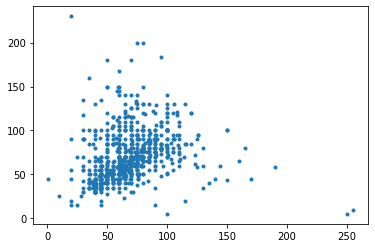

In [49]:
x1 = pokemon_df['HP'].values
x2 = pokemon_df['Defense'].values
x3 = pokemon_df['Sp_Def'].values

# Option 1 - Pyplot.plot
plt.plot(x1,x2,marker='.',linestyle='none')

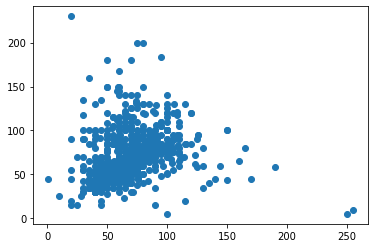

In [50]:
# Option 2 - Pyplot.scatter
plt.scatter(x1,x2)



<AxesSubplot:xlabel='Sp_Def', ylabel='Defense'>

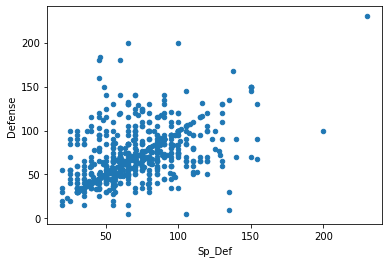

In [51]:
# Option 3 - Pandas
pokemon_df.plot.scatter(x='Sp_Def',y='Defense')



> <b>Note</b>: Some visualization packages utilize Pandas DataFrames!

In [52]:
# ... Option 4 - Seaborn
import seaborn as sns # this is a Python joke, but has become standard
                      # stands for Samuel Norman "Sam" Seaborn
                      # A character in The West Wing?

<AxesSubplot:xlabel='Sp_Def', ylabel='Defense'>

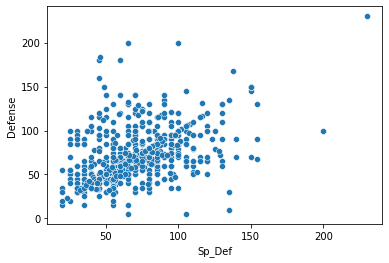

In [55]:
# Option 4 - using Seaborn
sns.scatterplot(x='Sp_Def',y='Defense',data=pokemon_df)



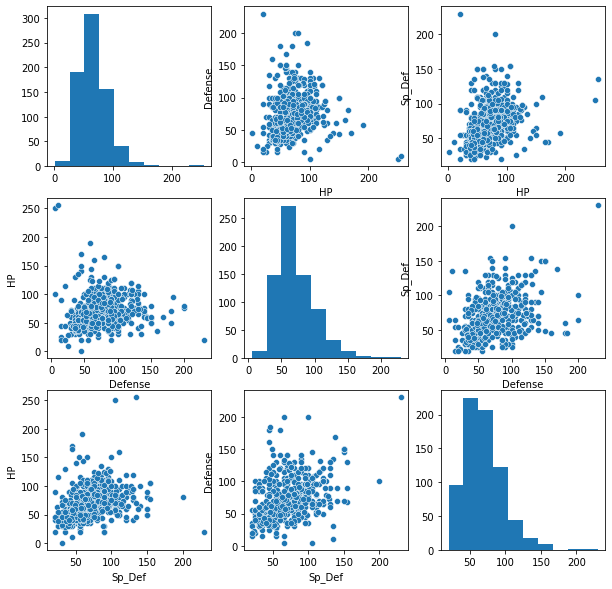

In [56]:
# Now all together
df = pokemon_df[['HP','Defense','Sp_Def']] # another way to filer

fig, axs = plt.subplots(3,3,figsize=(10,10))
axs = axs.ravel()
columns = df.columns.tolist()
col_x_col = [(col_1,col_2) for col_1 in columns for col_2 in columns]

for i, (ax,col_pair) in enumerate(zip(axs,col_x_col)):
    
    if i in [0,4,8]:
        vals = df[col_pair[0]].values
        ax.hist(vals)
    else:
        sns.scatterplot(x=col_pair[0],y=col_pair[1],data=df,ax=ax)



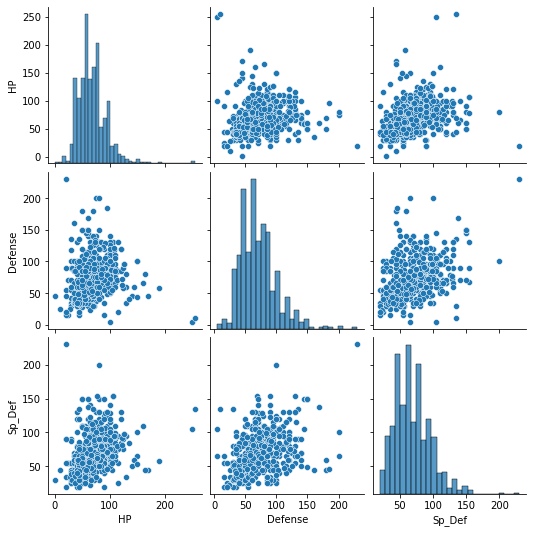

In [57]:
# wow... this is way easier
sns.pairplot(df);

### GroupBy for quick data exploration

The GroupBy instance method let's us partition a DataFrame by desireable characteristics (the column descriptors or categorical metadata stored in the columns).

In [58]:
pokemon_df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [59]:
# Let's look at grouping by common values (we snuck this in early)
target_col = 'Type_1'
grass_type_df = pokemon_df[pokemon_df['Type_1']=='Grass']

grass_type_df.head() # contains only those rows where Type_1 is Grass

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
42,43,Oddish,Grass,Poison,320,45,50,55,75,65,...,Blue,True,0.500,Grass,NaN,False,0.51,5.4,255,head_legs
43,44,Gloom,Grass,Poison,395,60,65,70,85,75,...,Blue,True,0.500,Grass,NaN,False,0.79,8.6,120,bipedal_tailless


In [65]:
# we can use group by as a way of applying these to all common values
grouped_df = pokemon_df.groupby('Type_1')

grouped_df

In [66]:
# we can apply methods/functions for a grouping and columns of interests
grouped_means_df = pokemon_df.groupby('Type_1')[['HP','Defense','Sp_Def']].mean()



In [67]:
grouped_means_df



,HP,Defense,Sp_Def
Type_1,,,
Bug,55.952381,67.698413,62.158730
Dark,67.178571,67.928571,67.500000
Dragon,78.041667,79.125000,83.041667
Electric,59.500000,59.083333,67.722222
Fairy,74.117647,65.705882,84.705882
Fighting,70.240000,64.280000,63.680000
Fire,68.595745,64.893617,69.468085
Flying,68.000000,61.666667,66.666667
Ghost,61.565217,75.956522,76.478261


## Let's practice with the Week 5 Data Exercise I